In [1]:
from env import HollowKnightEnv
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, VecTransposeImage

import time


env = HollowKnightEnv()

test_env = HollowKnightEnv()  # 用于评估的环境
eval_env = Monitor(test_env)  # 包装为监控环境
eval_env = DummyVecEnv([lambda: eval_env])  # 包装为向量
eval_env = VecTransposeImage(eval_env)  # 转置图像以适应模型输入

model = PPO(policy="MultiInputPolicy", env=env, verbose=1, n_steps=512)

callback = EvalCallback(
    eval_env,
    best_model_save_path='./logs/hollow_knight_model',   # 最优模型保存目录
    log_path='./logs/',               # 日志目录
    n_eval_episodes= 2,  # 每次评估3个episode
    eval_freq=1024,                   # 每512步评估一次
)

# 站到雕像前，运行
time.sleep(2)
model.learn(1_0000, callback=callback)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
[RESET] 第1轮战斗
timestep:1, action:('Turn_Left', 'Attack_Up') reward:0.000, boss_hp:900
timestep:3, action:('Turn_Left', 'Mid_Jump_Attack') reward:0.000, boss_hp:900
timestep:5, action:('Turn_Right', 'Attack') reward:0.000, boss_hp:900
timestep:7, action:('Move_Right', 'Attack') reward:0.000, boss_hp:900
timestep:9, action:('Turn_Right', 'Attack_Up') reward:0.000, boss_hp:900
timestep:11, action:('Move_Right', 'Mid_Jump_Attack') reward:0.000, boss_hp:900
timestep:13, action:('Move_Right', 'Attack_Up') reward:0.000, boss_hp:900
timestep:15, action:('Move_Right', 'Attack_Up') reward:-0.010, boss_hp:867
timestep:17, action:('Move_Left', 'Attack_Down') reward:0.000, boss_hp:867
timestep:19, action:('Turn_Right', 'Attack_Down') reward:0.000, boss_hp:867
timestep:21, action:('Turn_Right', 'Attack_Up') reward:0.000, boss_hp:867
timestep:23, action:('Move_Left',

KeyboardInterrupt: 

In [1]:
from stable_baselines3.common.env_checker import check_env
from env import HollowKnightEnv

import time


env = HollowKnightEnv()

time.sleep(2)

check_env(env, warn=True)

[RESET] 第1轮战斗
[RESET] 第2轮战斗
timestep:1, action:('Move_Right', 'Attack') reward:0.000, boss_hp:900, done:False
[RESET] 第3轮战斗
timestep:2, action:('Turn_Left', 'Attack') reward:0.000, boss_hp:900, done:False
timestep:3, action:('Turn_Left', 'Attack_Down') reward:0.000, boss_hp:900, done:False
timestep:4, action:('Turn_Right', 'Attack_Down') reward:0.000, boss_hp:900, done:False
timestep:5, action:('Turn_Left', 'Attack_Down') reward:0.000, boss_hp:900, done:False
timestep:6, action:('Move_Right', 'Attack') reward:0.000, boss_hp:900, done:False
timestep:7, action:('Move_Left', 'Mid_Jump_Attack') reward:0.000, boss_hp:900, done:False
timestep:8, action:('Move_Left', 'Attack') reward:0.000, boss_hp:900, done:False
timestep:9, action:('Move_Left', 'Attack') reward:0.000, boss_hp:900, done:False
timestep:10, action:('Turn_Left', 'Mid_Jump_Attack') reward:0.000, boss_hp:900, done:False
timestep:11, action:('Move_Left', 'Attack') reward:0.000, boss_hp:900, done:False


In [3]:
from env import HollowKnightEnv
from sb3_contrib.common.maskable.utils import get_action_masks

env = HollowKnightEnv()
obs, info = env.reset()
n_steps = 300
for _ in range(n_steps):
    # Random action
    # action_masks = get_action_masks(env)
    action = env.action_space.sample()
    obs, reward, done, truncated, info = env.step(action)
    if done:
        obs, info = env.reset()

[RESET] 第1轮战斗


KeyboardInterrupt: 

In [2]:
from sb3_contrib.common.maskable.evaluation import evaluate_policy
from sb3_contrib.common.maskable.utils import get_action_masks
from sb3_contrib import MaskablePPO

env = HollowKnightEnv()

model = MaskablePPO.load('./logs/hollow_knight_model.zip')


# # Evaluate the policy
# mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, deterministic=False)

# print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")


obs, info = env.reset()
n_steps = 1000
for _ in range(n_steps):
    # Random action
    action_masks = get_action_masks(env)
    action = model.predict(obs, action_masks, deterministic=True)[0]
    obs, reward, done, truncated, info = env.step(action)
    if done:
        obs, info = env.reset()

[RESET] 第1轮战斗


KeyboardInterrupt: 

In [1]:
from env import HollowKnightEnv
from sb3_contrib import MaskablePPO

env = HollowKnightEnv()
model = MaskablePPO(policy='CnnPolicy', env=env, verbose=1, n_steps=256, tensorboard_log="./logs/")

model.learn(total_timesteps=5000)

model.save('./logs/hollow_knight_model.zip')

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
[RESET] 第1轮战斗
Logging to ./logs/PPO_1
time_step:239, boss_hp:302, epoch_reward:-21.060
[RESET] 第2轮战斗
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 239      |
|    ep_rew_mean     | -21.1    |
| time/              |          |
|    fps             | 2        |
|    iterations      | 1        |
|    time_elapsed    | 99       |
|    total_timesteps | 256      |
---------------------------------
time_step:402, boss_hp:351, epoch_reward:-10.380
[RESET] 第3轮战斗
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 201        |
|    ep_rew_mean          | -15.7      |
| time/                   |            |
|    fps                  | 2          |
|    iterations           | 2          |
|    time_elapsed         | 195        |
|    total_timesteps      | 512 

In [3]:
from sb3_contrib.common.maskable.utils import get_action_masks
from sb3_contrib import MaskablePPO
from env import HollowKnightEnv

env = HollowKnightEnv()

model = MaskablePPO.load('./logs/hollow_knight_model.zip')

obs, info = env.reset()
n_steps = 1000
for _ in range(n_steps):

    action_masks = get_action_masks(env)
    # print(action_masks)
    action = model.predict(obs, action_masks=action_masks, deterministic=False)[0]
    obs, reward, done, truncated, info = env.step(action)
    if done:
        break
        # obs, info = env.reset()

[RESET] 第1轮战斗
time_step:201, boss_hp:383, epoch_reward:-8.740


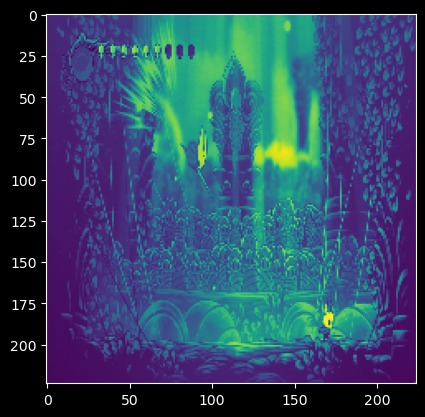

In [17]:
from utils import get_frame_grey
import time
import cv2
import matplotlib.pyplot as plt

IMG_SIZE = 224

time.sleep(2)

frame = get_frame_grey()
frame_resized = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))



plt.imshow(frame_resized)

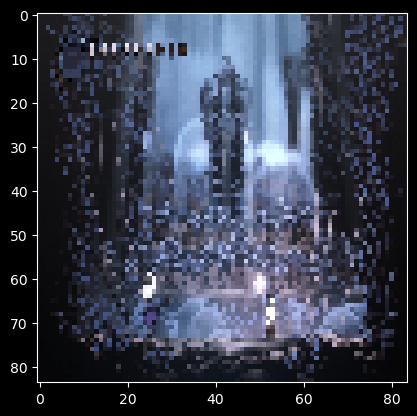

In [16]:
from utils import get_frame_rgb
import time
import cv2
import matplotlib.pyplot as plt

IMG_SIZE = 84

time.sleep(2)

frame = get_frame_rgb()
frame_resized = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))



plt.imshow(frame_resized)

In [19]:
import torch
import torch.nn as nn
from torchvision import models
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor

from env import HollowKnightEnv
from sb3_contrib import MaskablePPO

from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.vec_env import VecNormalize


class ResNetFeatureExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space, features_dim=512):
        super().__init__(observation_space, features_dim)
        # 加载预训练的ResNet18（可换为ResNet34/50等）
        resnet = models.resnet18(pretrained=True)
        # 去掉最后的全连接层
        self.resnet = nn.Sequential(*list(resnet.children())[:-1])
        self._features_dim = resnet.fc.in_features

    def forward(self, observations):
        # 输入shape: (batch, C, H, W)
        if observations.shape[1] != 3:
            # 如果是多帧堆叠，取最后一帧或做平均
            observations = observations[:, -3:, :, :]
        x = self.resnet(observations)
        x = x.view(x.size(0), -1)
        return x
    

policy_kwargs = dict(
    features_extractor_class=ResNetFeatureExtractor,
    features_extractor_kwargs=dict(features_dim=512),
)


train_env = HollowKnightEnv()
train_env = DummyVecEnv([lambda: Monitor(train_env)])
train_env = VecNormalize(train_env, norm_obs=True, norm_reward=True)

model = MaskablePPO(
    policy="CnnPolicy",
    env=train_env,
    policy_kwargs=policy_kwargs,
    verbose=1,
    n_steps=256,
    tensorboard_log="./logs/"
)

model.learn(total_timesteps=5000)
model.save('./logs/hollow_knight_model.zip')

Using cuda device


d:\miniconda3\envs\python3.8\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\miniconda3\envs\python3.8\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[RESET] 第1轮战斗
Logging to ./logs/PPO_2
time_step:216, boss_hp:63, epoch_reward:1.560
[RESET] 第2轮战斗
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 216      |
|    ep_rew_mean     | 1.56     |
| time/              |          |
|    fps             | 2        |
|    iterations      | 1        |
|    time_elapsed    | 112      |
|    total_timesteps | 256      |
---------------------------------
time_step:316, boss_hp:596, epoch_reward:-41.480


KeyboardInterrupt: 